<img src="https://th.bing.com/th/id/R.f5673a58a1ee57924525f8ebf18c7c44?rik=6ydzCA%2bynqUsJw&pid=ImgRaw&r=0" alt="Kaggle Logo" width="1000" height="100">

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [20]:
df=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


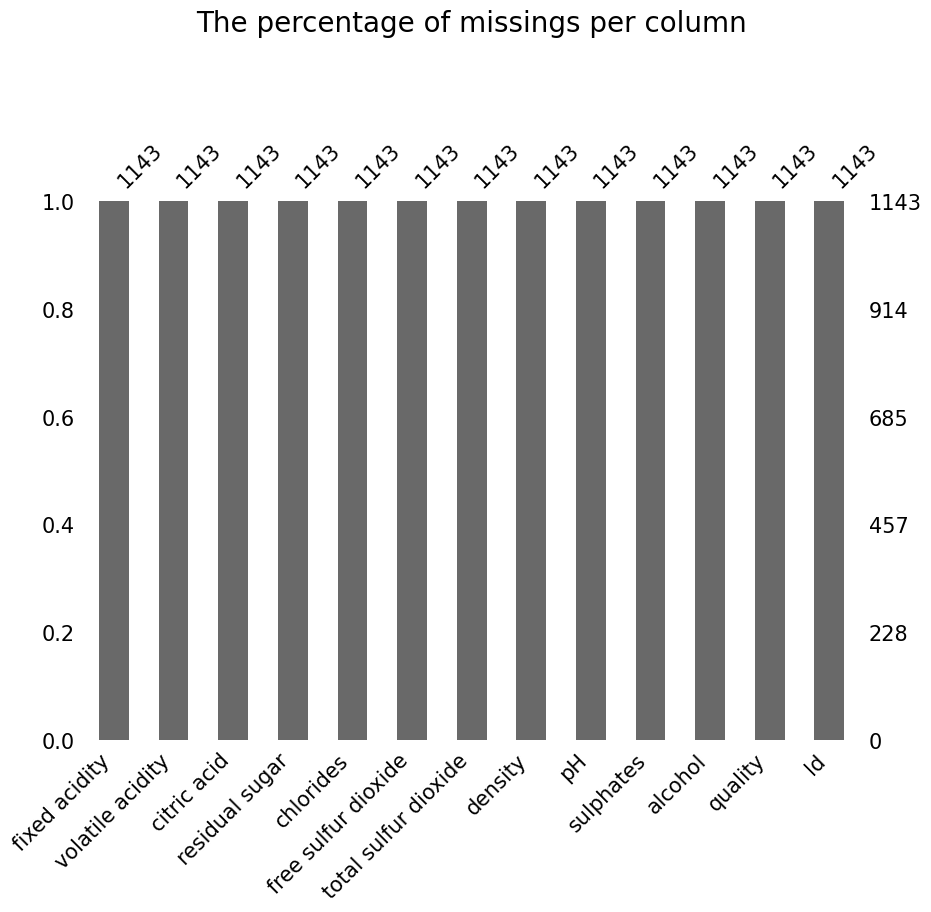

In [7]:
df.isnull().sum()
msno.bar(df,figsize=(10,7),fontsize=15)
plt.title("The percentage of missings per column", y=1.3, fontsize=20)
plt.show()

In [8]:
df.duplicated().all()

False

In [9]:
df=df.drop(columns=['Id'])

In [10]:
df.shape

(1143, 12)

# Distrbution of catgorical column

<AxesSubplot:>

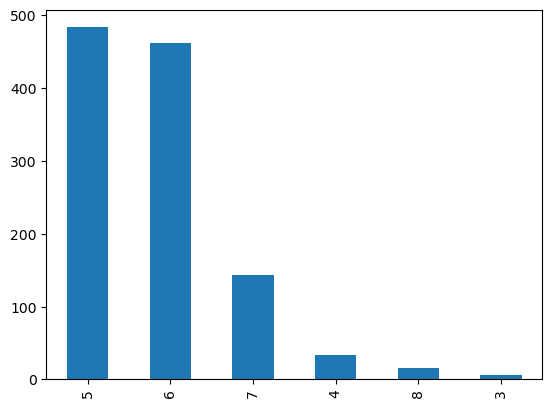

In [11]:
df['quality'].value_counts().plot(kind='bar')

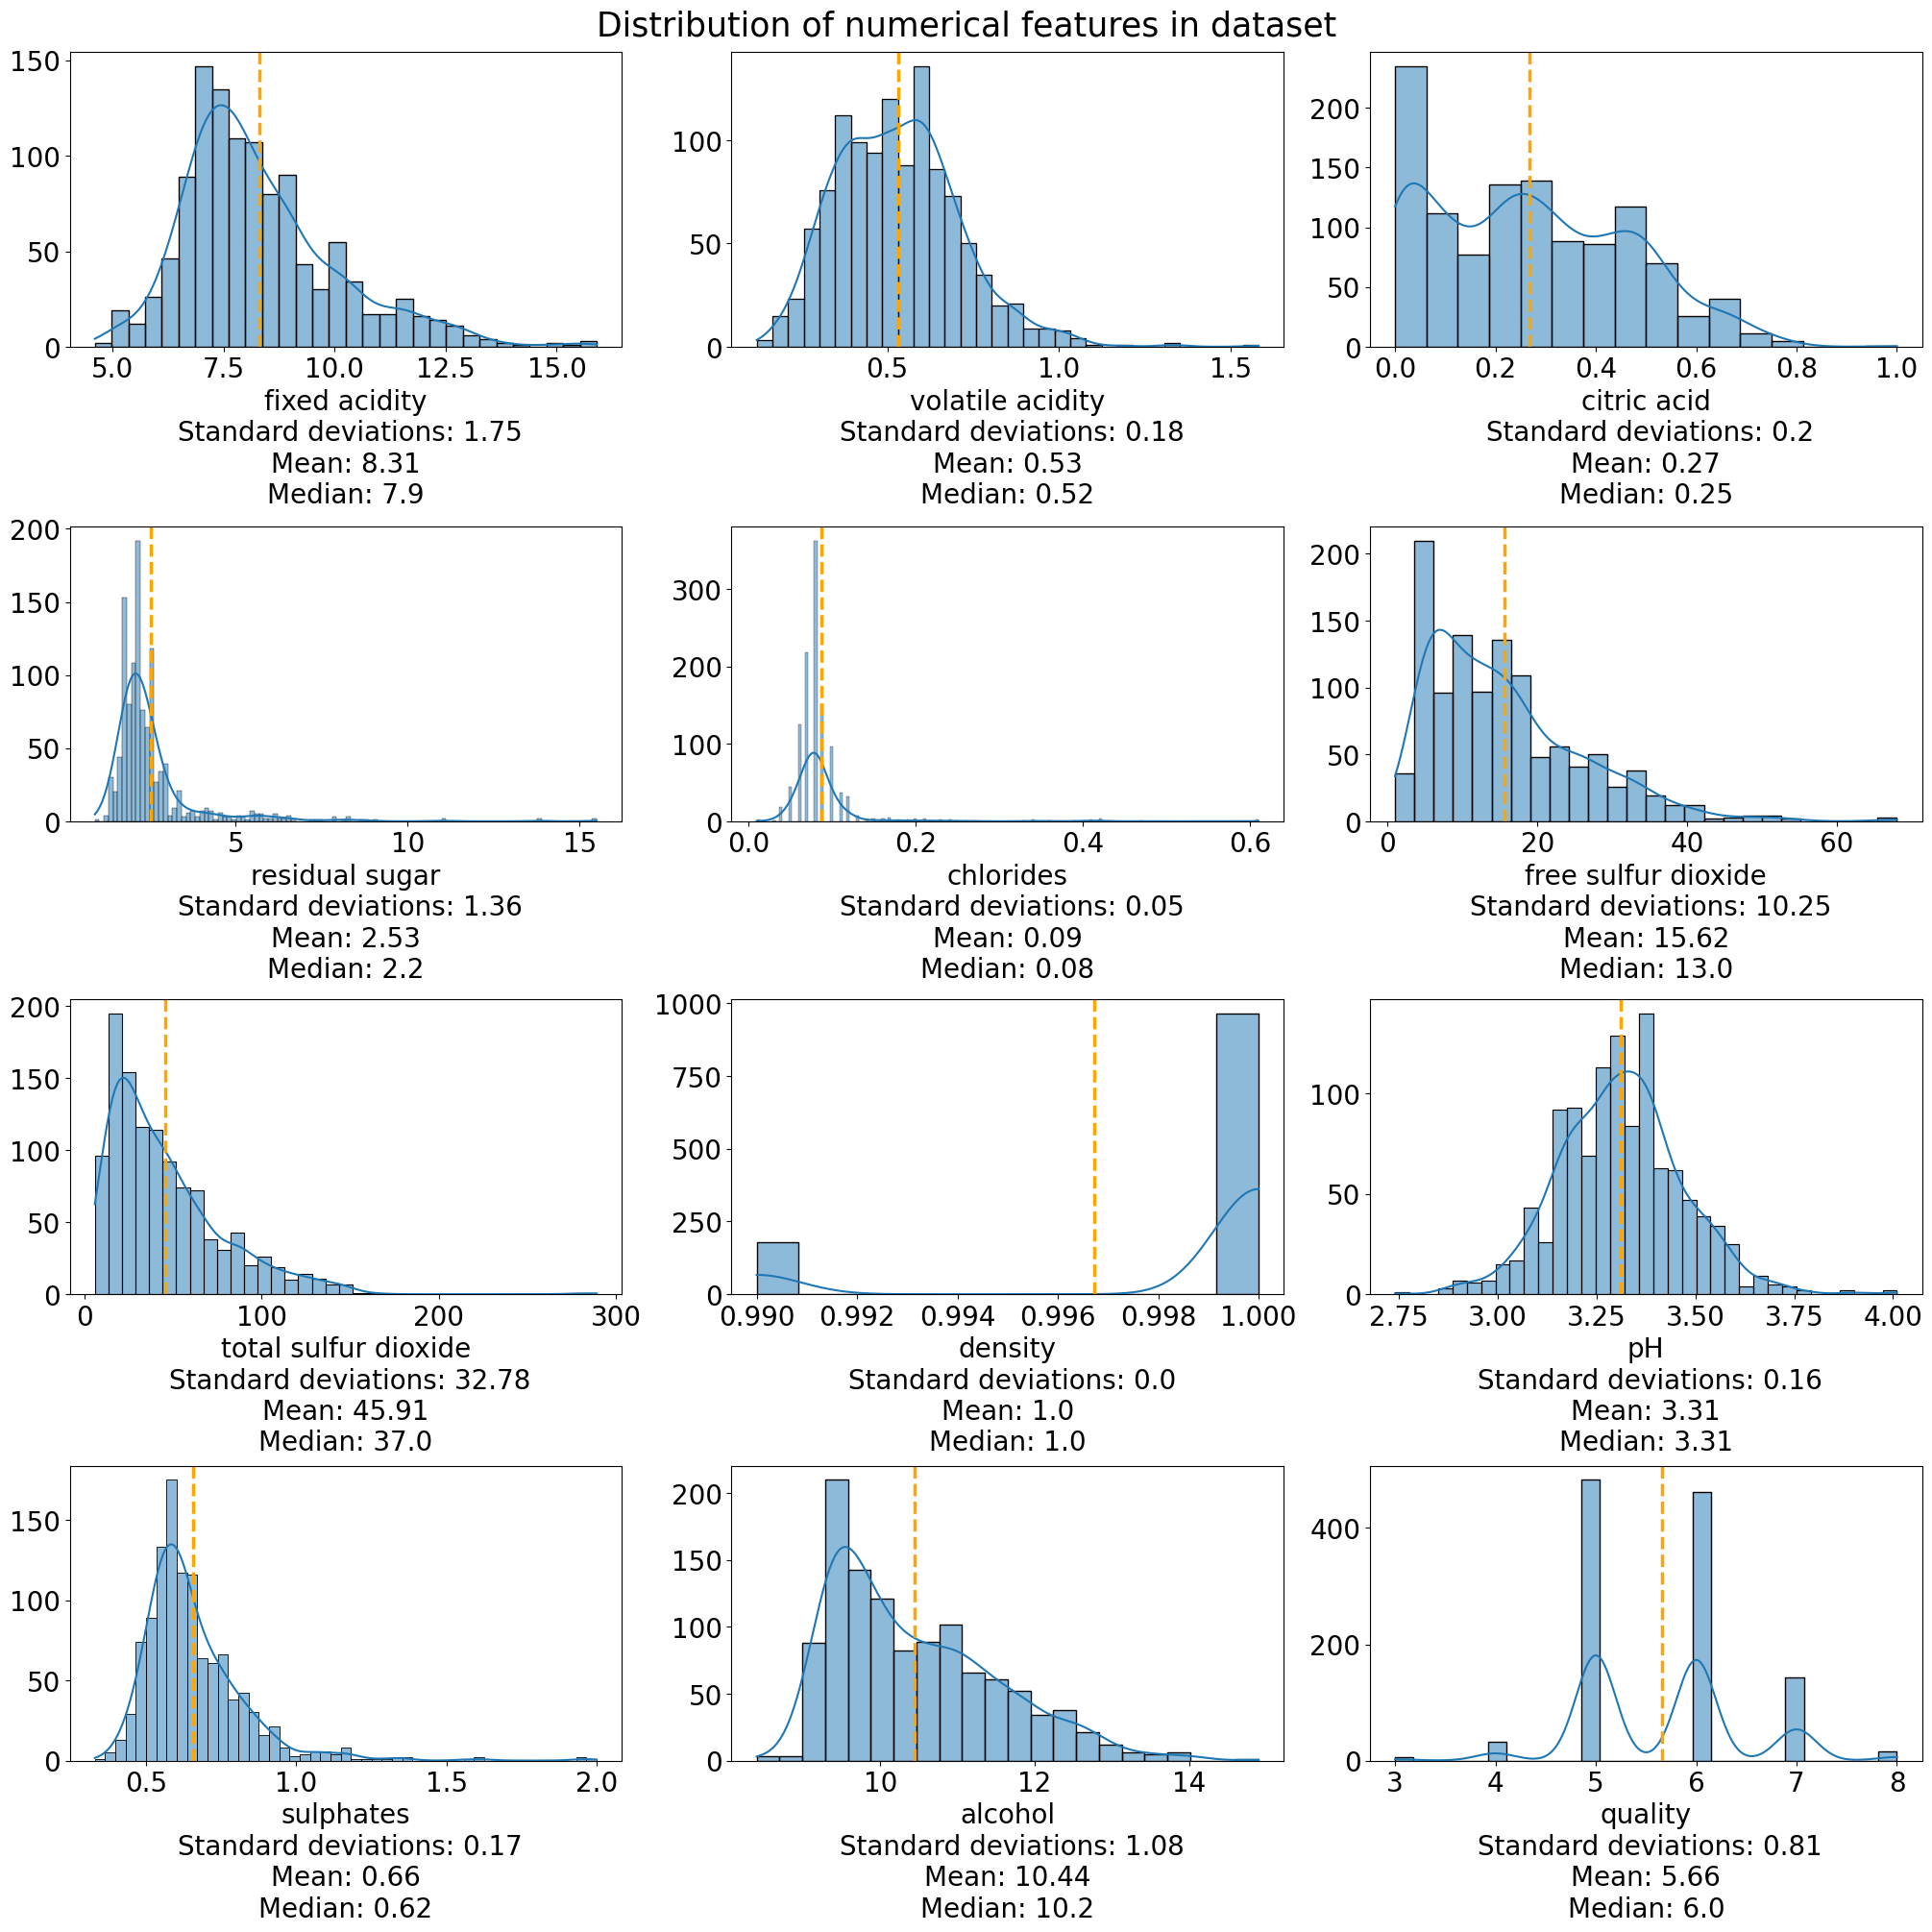

In [70]:
fig, ax = plt.subplots(4,3, constrained_layout= True)
fig.set_size_inches(20,20)
ax_list =[]
for n in range(4):
    for m in range(3):
        ax_list.append(ax[n,m])
        

for i in range(len(list(df.columns[:-1]))):
    col = df.columns[i]
    sns.histplot(round(df[col],2), ax = ax_list[i], kde =True)
    ax_list[i].set_xlabel(col + '\n Standard deviations: ' + str(round(df[col].std(),2)) + '\nMean: ' + str(round(df[col].mean(),2)) +
                          '\nMedian: ' + str(round(df[col].median(),2)), size =20)
    
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis ='y', labelsize =20)
    ax_list[i].tick_params(axis ='x', labelsize = 20)
    ax_list[i].axvline(df[col].mean(), c= 'orange', ls ='--', lw=2.5)
    
    
fig.suptitle('Distribution of numerical features in dataset', size =25)
    
plt.show()

# Fixed acidity

 ### Refers to the amount of non-volatile acids in wine, such as tartaric acid, malic acid, and citric acid. High levels of fixed acidity can add complexity and freshness to wine, but too much acidity can make it taste sour or harsh
let's see effective of fixed acidity on quality

Text(0.5, 1.0, 'Fixed acidity by wine quality')

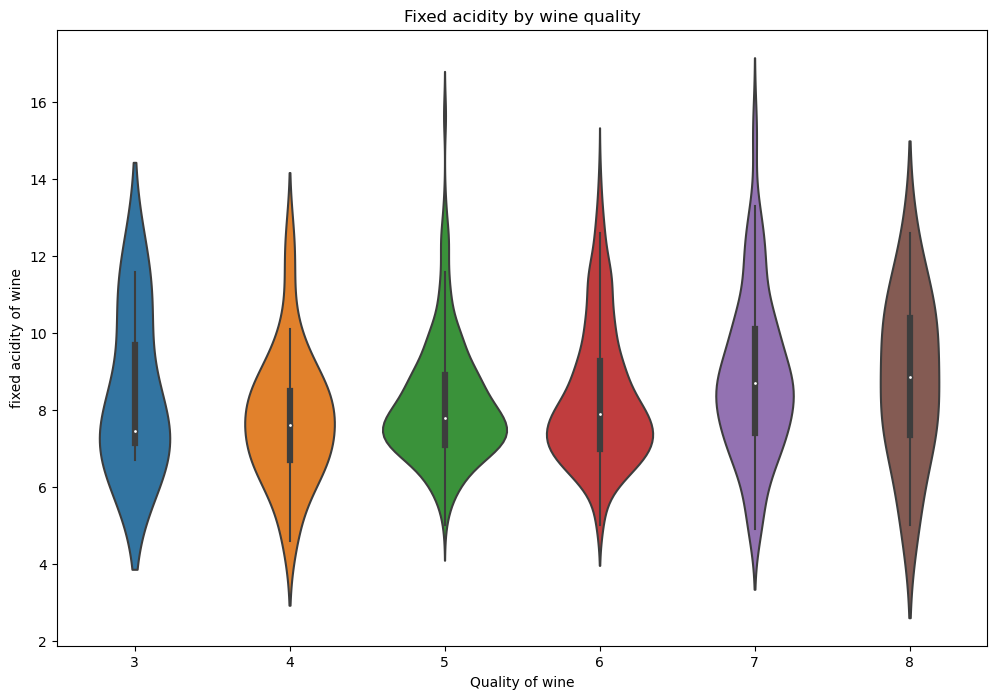

In [13]:
plt.figure(figsize=(12,8))
sns.violinplot(x='quality', y='fixed acidity',data=df)
plt.xlabel('Quality of wine')
plt.ylabel('fixed acidity of wine')
plt.title('Fixed acidity by wine quality')

# Volatile acidity
### Refers to the amount of volatile acids in wine, such as acetic acid and lactic acid. Low levels of volatile acidity can add fruity and floral aromas to wine, but too much volatile acidity can make it smell like vinegar or nail polish remover

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


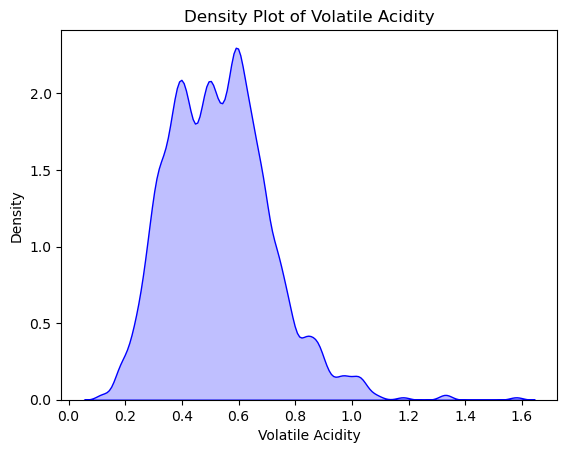

In [14]:
sns.kdeplot(df['volatile acidity'], color='blue', shade=True, bw_adjust=0.5)
plt.title('Density Plot of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

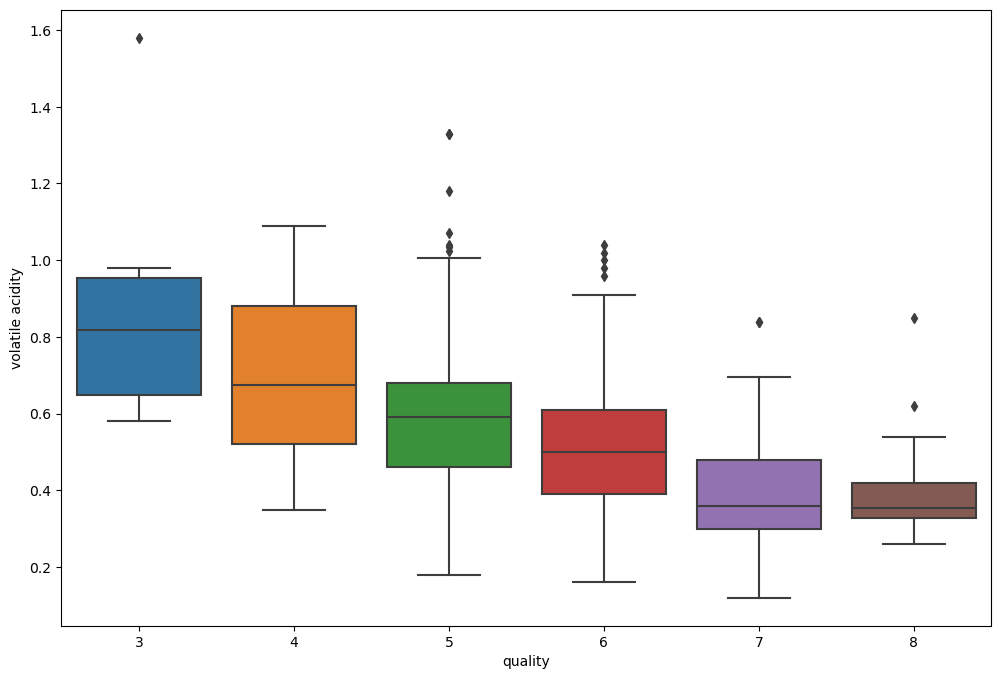

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='quality',y='volatile acidity',data=df)

<h1 style="color:#00bfff">Distribution of low values of volatile acidity and fixed acidity to see affect of tst of wine</h1>


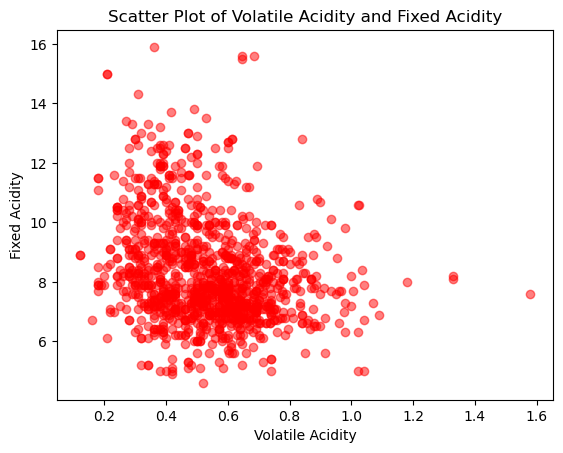

In [16]:
plt.scatter(df['volatile acidity'], df['fixed acidity'], color='red', marker='o', alpha=0.5)
plt.title('Scatter Plot of Volatile Acidity and Fixed Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Fixed Acidity')
plt.show()

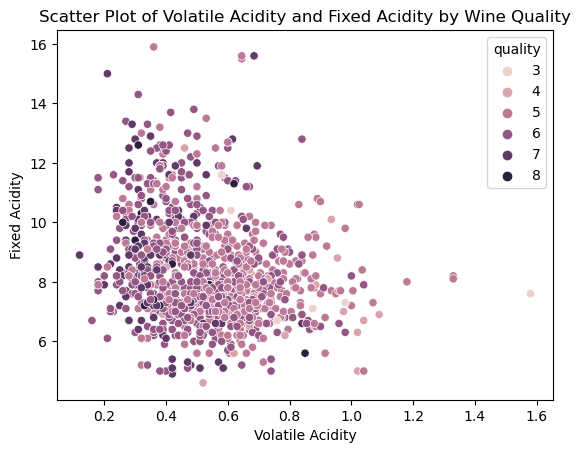

In [23]:
sns.scatterplot(x='volatile acidity', y='fixed acidity', hue='quality', data=df)
plt.title('Scatter Plot of Volatile Acidity and Fixed Acidity by Wine Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Fixed Acidity')
plt.show()

# Citric acid
### Refers specifically to the amount of citric acid in wine. Citric acid can add a tart and tangy flavor to wine, and can also serve as a preservative

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

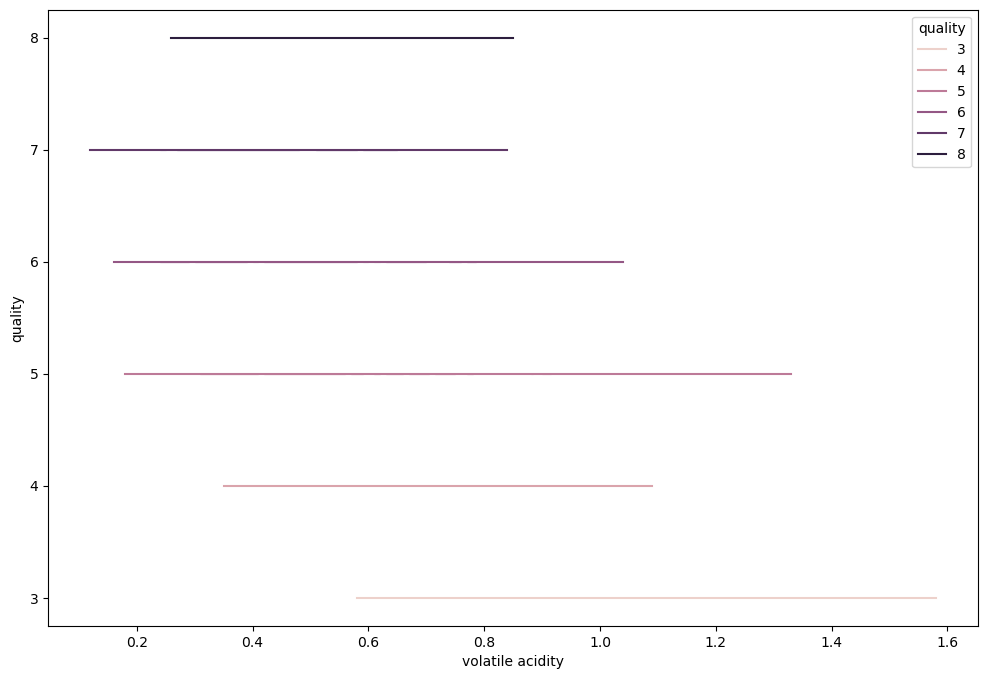

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(x='volatile acidity',y='quality',hue='quality',data=df)

# Residual sugar
### Refers to the amount of sugar that remains in wine after fermentation. Low levels of residual sugar can result in a dry and crisp wine, while high levels of residual sugar can result in a sweet and fruity wine.

Text(0.5, 1.0, 'Relation level with Residual Sugar & quality')

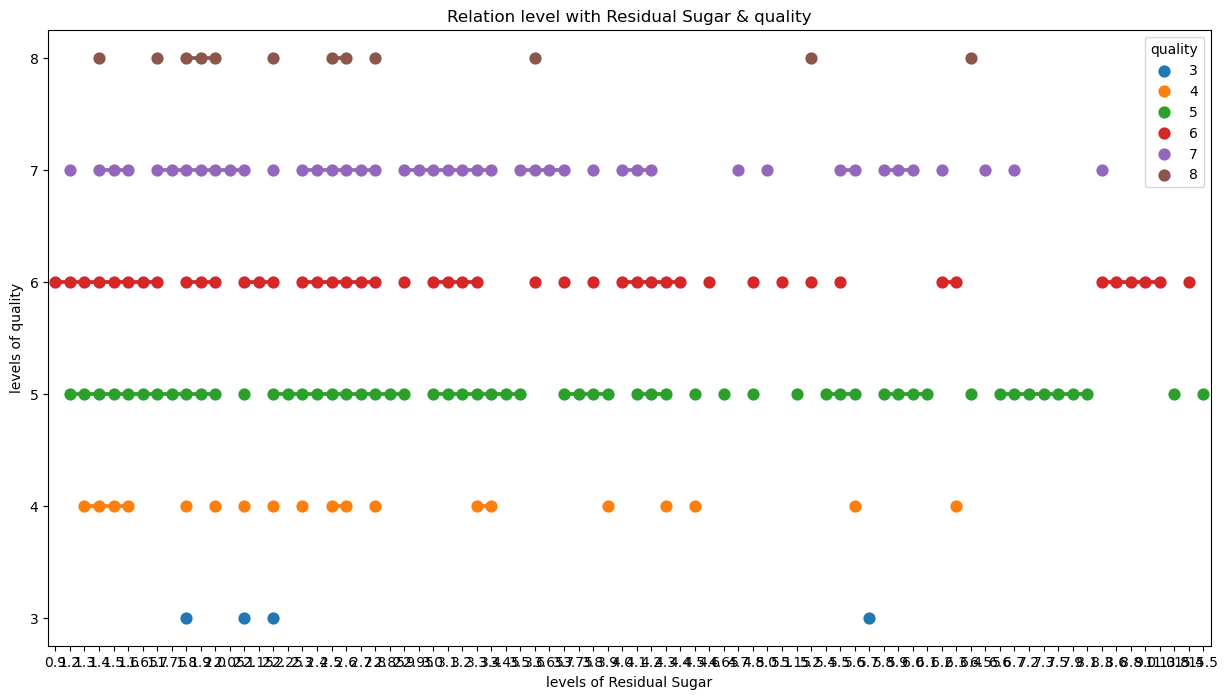

In [50]:
plt.figure(figsize=(15,8))
sns.pointplot(x='residual sugar',y='quality',hue='quality',data=df)
plt.xlabel('levels of Residual Sugar')
plt.ylabel('levels of quality')
plt.title('Relation level with Residual Sugar & quality')

# <h3 style="color:#ff0000">we notice here high levels of residual sugar is low and this lead to it taste bitter or metallic</h3>


# Free sulfur dioxide
### Refers to the amount of sulfur dioxide that is not bound to other molecules in wine. Free sulfur dioxide acts as an antioxidant and a preservative, and can also inhibit the growth of unwanted microorganisms in wine

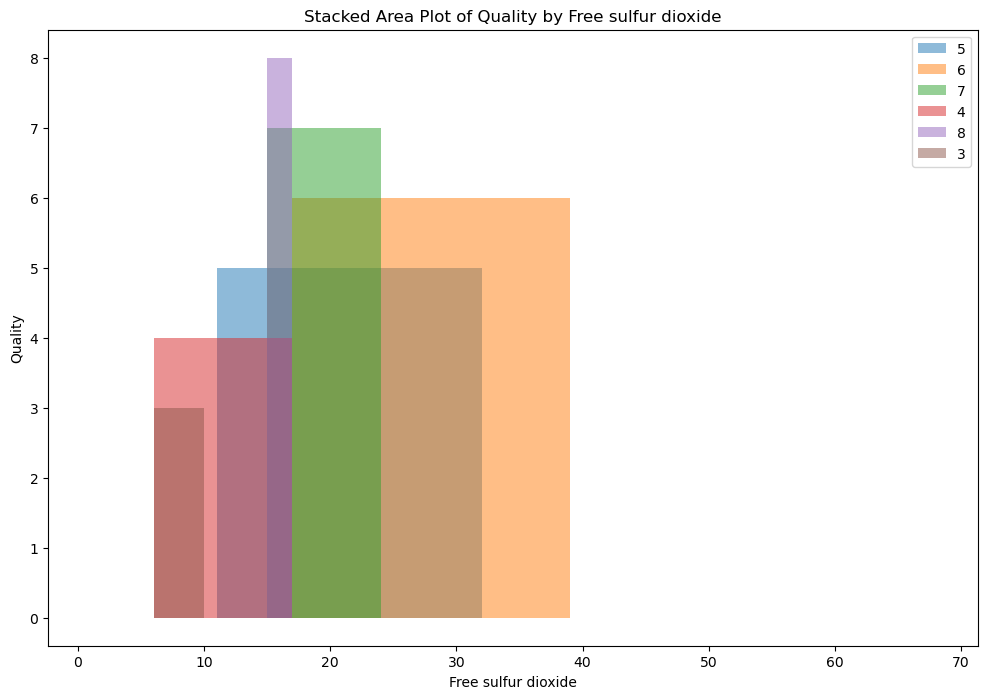

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
quality_categories = df['quality'].unique()
for cat in quality_categories:
    data = df[df['quality'] == cat]
    ax.fill_between(data['free sulfur dioxide'], data['quality'], label=cat, alpha=0.5)
ax.legend()
plt.title('Stacked Area Plot of Quality by Free sulfur dioxide')
plt.xlabel('Free sulfur dioxide')
plt.ylabel('Quality')
plt.show()

# Chlorides
### Refers to the amount of chloride ions in wine. Chlorides can contribute to the saltiness and mineral character of wine, but too much chloride can make it taste bitter or metallic

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

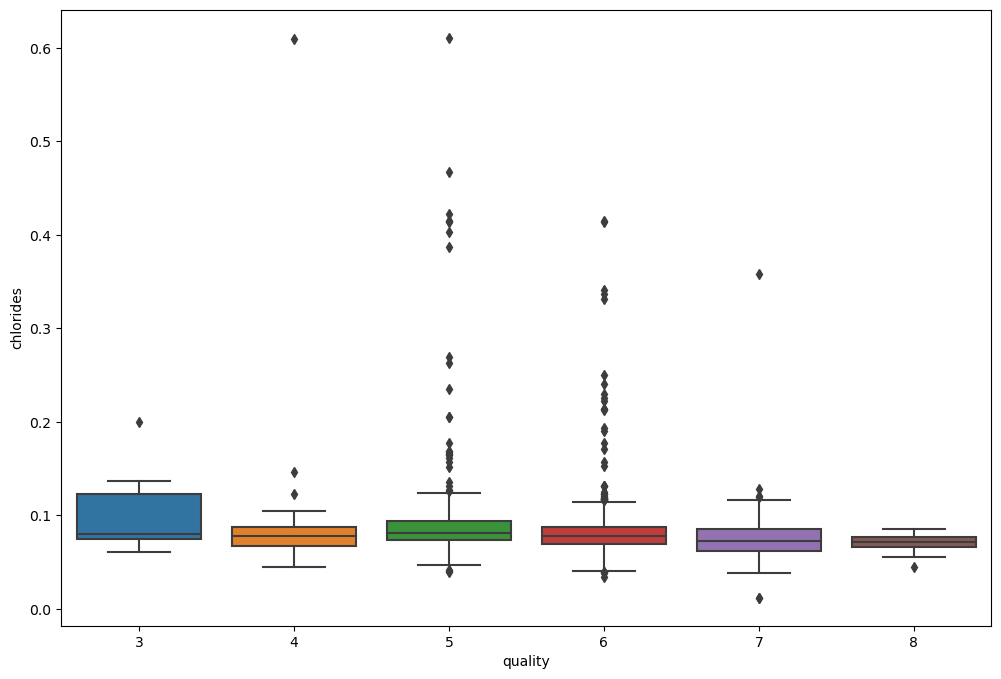

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='quality',y='chlorides',data=df)

# Total sulfur dioxide
### Refers to the total amount of sulfur dioxide in wine, including free and bound forms. Too much sulfur dioxide can give wine a pronounced sulfurous odor and taste, but too little sulfur dioxide can make it vulnerable to oxidation and spoilage.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

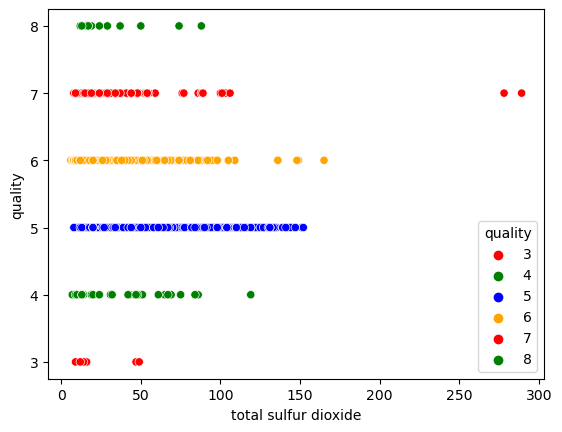

In [68]:
my_palette = ['red', 'green', 'blue', 'orange']
sns.scatterplot(x='total sulfur dioxide', y='quality', hue='quality',palette=my_palette, data=df)


# Density
### Refers to the mass per unit volume of wine. Density can be used to calculate the alcohol content and sugar content of wine, and can also affect the mouthfeel and viscosity of wine.
**

Text(0.5, 1.0, 'Ratio between Density and quality of wine')

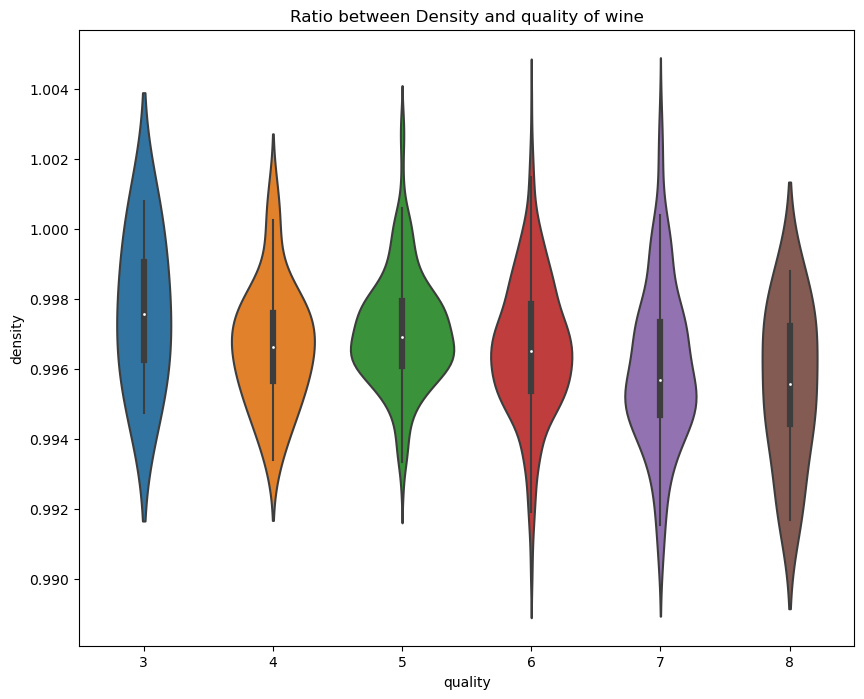

In [74]:
plt.figure(figsize=(10,8))
sns.violinplot(x='quality',y='density',data=df)
plt.title('Ratio between Density and quality of wine')

# Sulfates
### Refers to the amount of sulfur-containing compounds in wine, such as sulfur dioxide and sulfites. Sulfates can serve as antioxidants and preservatives, but too much sulfate can cause allergic reactions in some people.
**

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

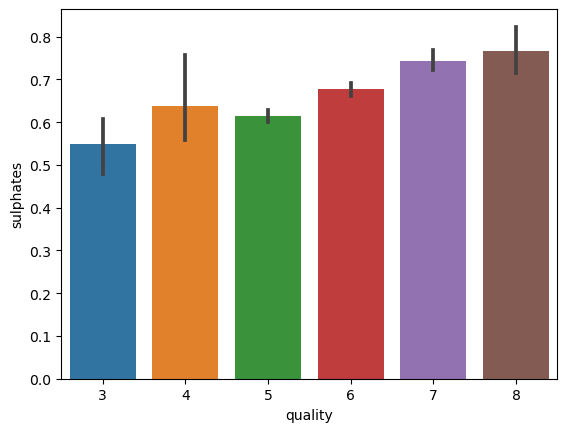

In [79]:
sns.barplot(x='quality', y='sulphates', data=df)

# pH
### Refers to the acidity of wine on a logarithmic scale. pH can affect the color, flavor, and stability of wine, and can also influence the growth of yeast and bacteria during fermentation.**

<AxesSubplot:xlabel='quality', ylabel='pH'>

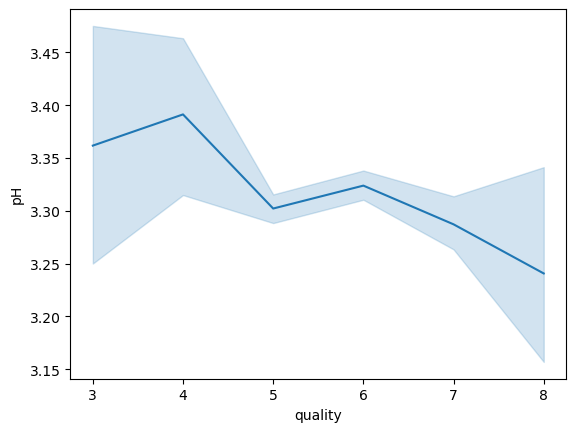

In [82]:
sns.lineplot(x='quality',y='pH',data=df)

# Alcohol
### Refers to the percentage of ethanol in wine. Alcohol can affect the body and mouthfeel of wine, and can also influence its aroma and flavor.**

In [96]:
# Create a parallel coordinates plot of alcohol by quality
plt.figure(figsize=(12,8))
fig = px.parallel_coordinates(df, dimensions=['quality', 'alcohol'], color='alcohol')
fig.show()


<Figure size 1200x800 with 0 Axes>

# check multicordinality by correlation of number columns 

<AxesSubplot:>

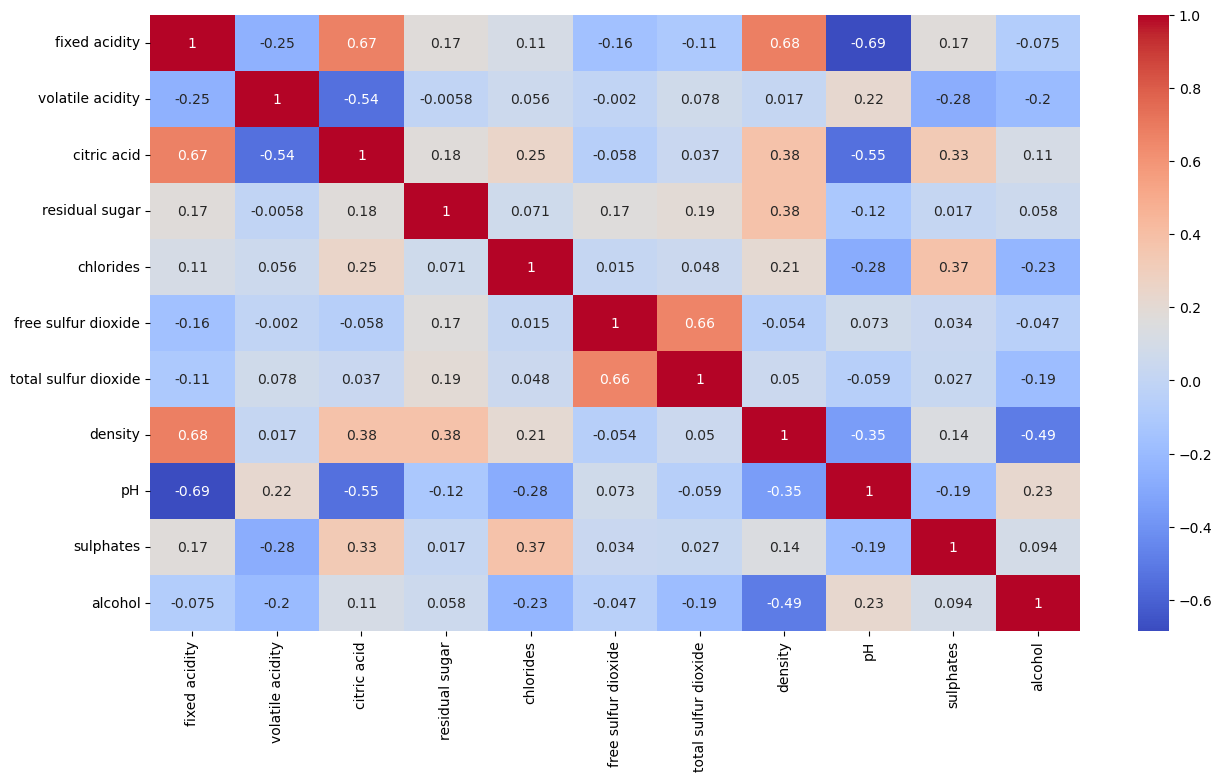

In [104]:
plt.figure(figsize=(15,8))
corr_num=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm')


# See Outliers in Columns**

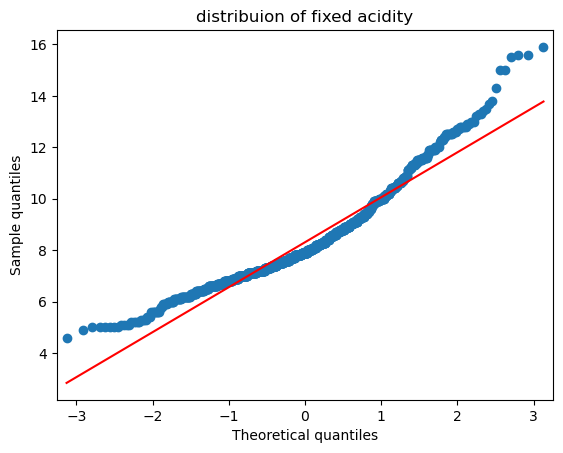

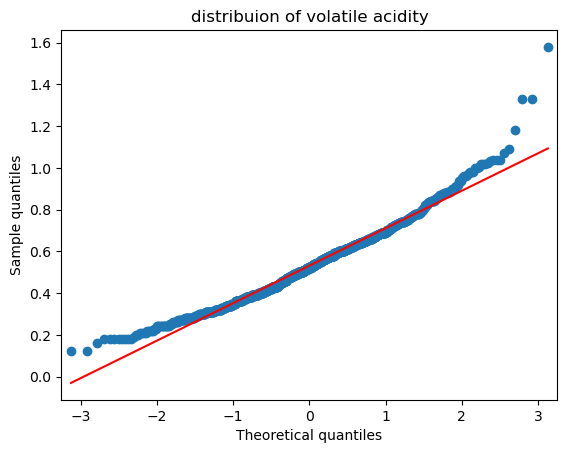

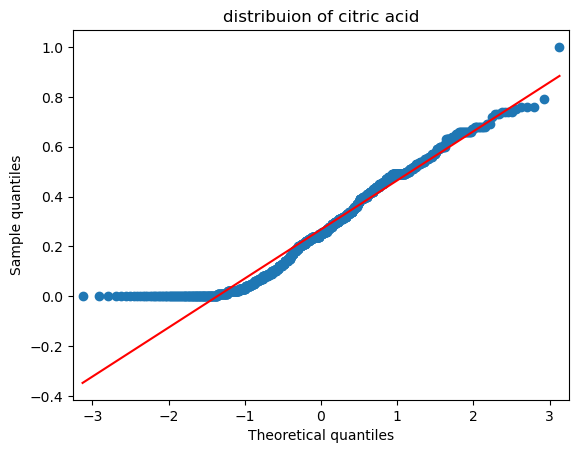

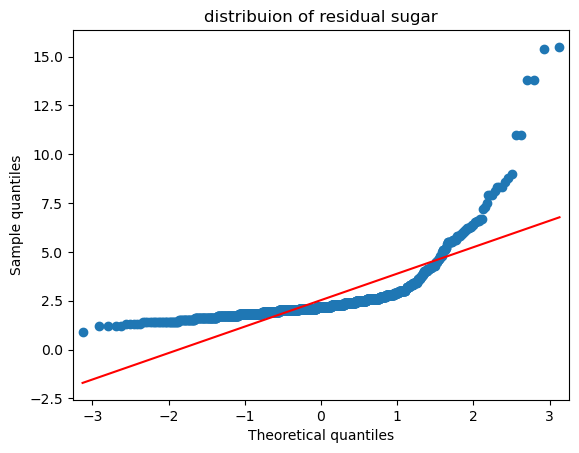

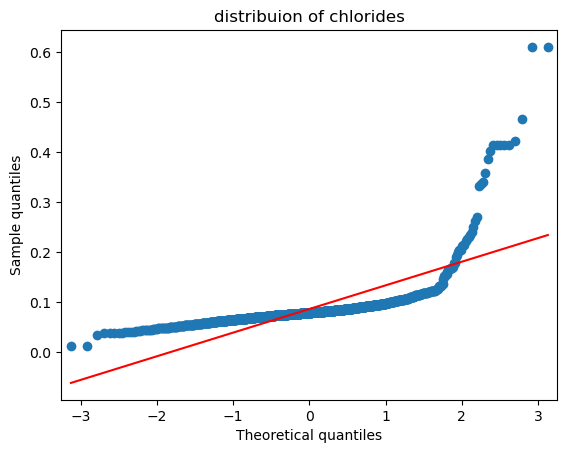

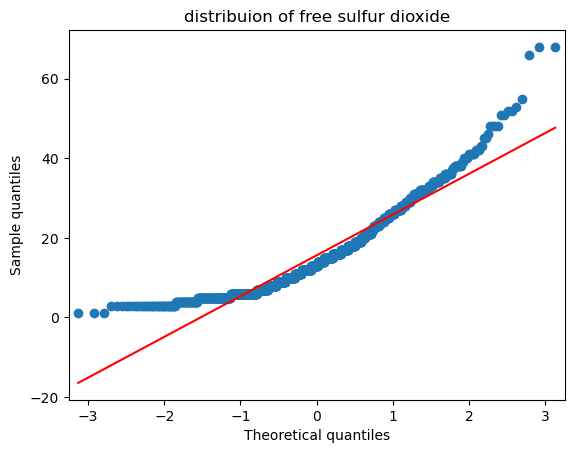

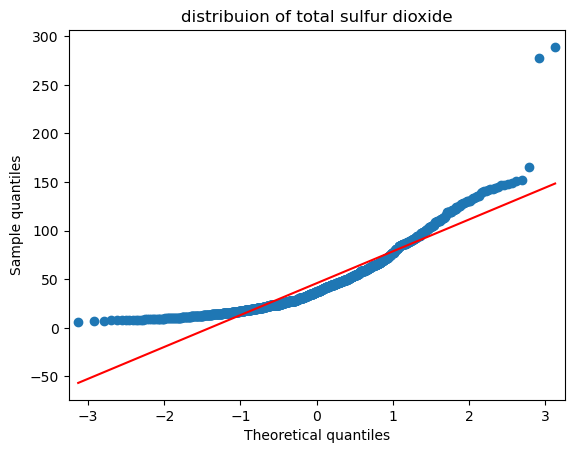

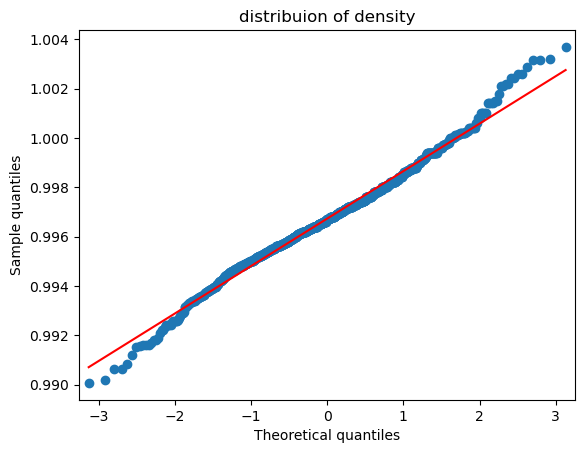

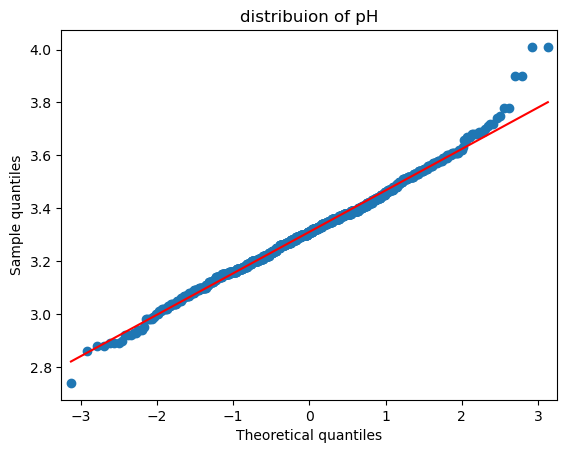

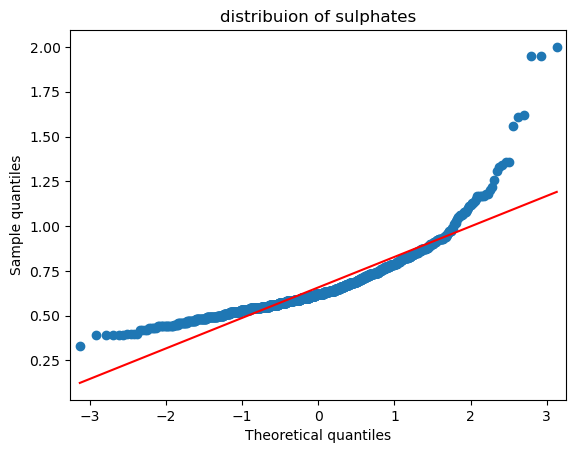

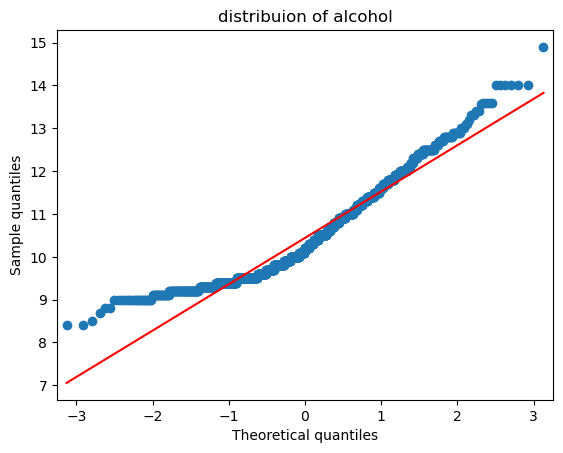

In [100]:
from scipy.stats import skew
import statsmodels.api as sm
for col in df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]:
    sm.qqplot(df[col], line='s')
    plt.title(f'distribuion of {col}')
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Sample quantiles")

<h1 style="color:#ff0000">We have outliers in columns in this case prefer stay it to refer to lower levels affestive and high levels affective in taste and quality</h1>


# Data Preprocessing and Feature Engineering

In [105]:
#split data
X=df.drop(['quality'],axis=1)
y=df['quality']

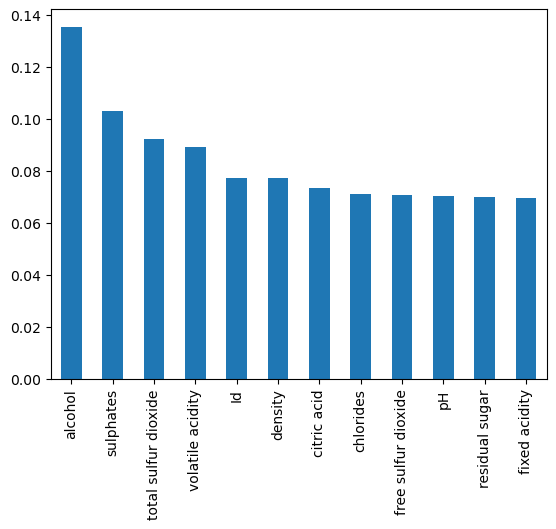

In [108]:
#feature selection
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
model.fit(X,y)
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(12).plot(kind='bar')
plt.show()

In [112]:
#Handel underfitting
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [113]:
#Build Model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [114]:
#stander scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1296, 12)
y_train: (1296,)
X_test: (324, 12)
y_test: (324,)


In [117]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf = rf_clf.fit(X_train,y_train)


y_pred = rf_clf.predict(X_test)

y_train_acc = rf_clf.score(X_train, y_train)
y_test_acc = rf_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')



train_accuracy:1.0
test_accuracy0.7746913580246914


**we had here overfitting because ratio of train large than test **

In [118]:
#Hyper-parameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}

rand_forest = RandomForestClassifier()

grid_search = GridSearchCV(rand_forest, param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 10, 'n_estimators': 200}


In [119]:
best_rand_forest = RandomForestClassifier(**best_params)

best_rand_forest.fit(X_train, y_train)

print('Train Accuracy: ', best_rand_forest.score(X_train,y_train))
print('Test Accuracy: ', best_rand_forest.score(X_test,y_test))

Train Accuracy:  0.9783950617283951
Test Accuracy:  0.7685185185185185


In [120]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(max_iter=100)

#fit model
lg_clf.fit(X_train, y_train)

#accuracy
y_train_acc = lg_clf.score(X_train, y_train)
y_test_acc = lg_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')

train_accuracy:0.7199074074074074
test_accuracy0.7098765432098766


In [122]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(n_estimators=10, max_depth=7, learning_rate=0.1)

#fit model
lgb_clf.fit(X_train, y_train)


#accuracy
y_train_acc = lgb_clf.score(X_train, y_train)
y_test_acc = lgb_clf.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')

train_accuracy:0.871141975308642
test_accuracy0.75


In [123]:
#volting
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
estimators = [('lg', LogisticRegression()),('lgbm', LGBMClassifier(n_estimators=10, max_depth=10, learning_rate=0.1))]
voting = VotingClassifier(estimators=estimators, voting='soft')
votingC = voting.fit(X_train, y_train)

## Testing
y_train_acc = votingC.score(X_train, y_train)
y_test_acc = votingC.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')


train_accuracy:0.8001543209876543
test_accuracy0.7407407407407407


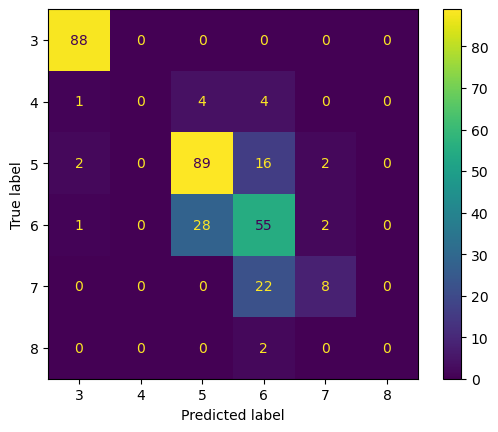

In [128]:
from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
plot_confusion_matrix(voting,X_test,y_test)

In [124]:
clf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score
# Use cross-validation to evaluate the model accuracy
scores = cross_val_score(clf, X, y, cv=10)
## Testing
y_train_acc = votingC.score(X_train, y_train)
y_test_acc = votingC.score(X_test, y_test)

print(f'train_accuracy:{y_train_acc}')
print(f'test_accuracy{y_test_acc}')

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=10.



train_accuracy:0.8001543209876543
test_accuracy0.7407407407407407


In [126]:
from sklearn.metrics import classification_report
#evaluate model performance 
y_predictions = best_rand_forest.predict(X_test)
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        88
           4       0.00      0.00      0.00         9
           5       0.76      0.83      0.79       109
           6       0.60      0.67      0.63        86
           7       0.68      0.43      0.53        30
           8       0.00      0.00      0.00         2

    accuracy                           0.77       324
   macro avg       0.50      0.49      0.49       324
weighted avg       0.75      0.77      0.75       324



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



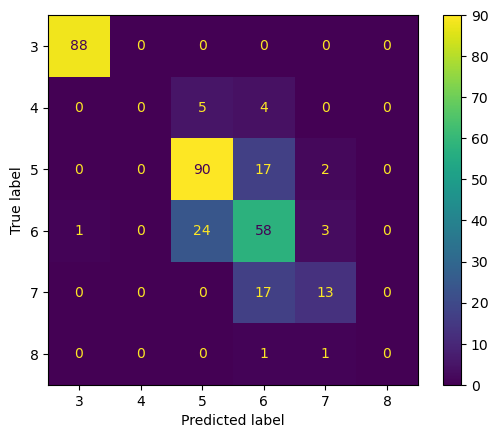

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
plt.show()

# <h1 style="color:#ff0000">Pipeline</h1>

In [132]:
from sklearn.pipeline import Pipeline
#for feature selection
from sklearn.feature_selection import SelectFromModel
#plot pipeline
from sklearn.utils import estimator_html_repr
from IPython.display import display, HTML

In [136]:
pipeline = Pipeline(steps=[
    ('selector', SelectFromModel(estimator=ExtraTreesClassifier())),
    ('scaler', StandardScaler()),
    ('scores',VotingClassifier(estimators=estimators, voting='soft'))
])

In [137]:
html = estimator_html_repr(pipeline)
display(HTML(html))

In [138]:
import joblib
joblib.dump(clf, 'wine_quality_model.pkl')

['wine_quality_model.pkl']